# Outages

In [1]:
!pip install pandas numpy scikit-learn
!pip install mlxtend

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats

In [3]:
df = pd.read_csv('Normalized Project Data - Solar Flare Values.csv')

In [4]:
df.columns

Index(['Year', 'Month', 'Total Daily Sunspots',
       'Northern Total Daily Sunspots', 'Southern Total Daily Sunspots',
       'Earthquake', 'Magnitude', 'Longitude', 'Latitude', 'OutagesCount',
       'None', 'D0', 'D1', 'D2', 'D3', 'D4', 'Solar Flare Value'],
      dtype='object')

In [5]:
df.corr()

,Year,Month,Total Daily Sunspots,Northern Total Daily Sunspots,Southern Total Daily Sunspots,Earthquake,Magnitude,Longitude,Latitude,OutagesCount,None,D0,D1,D2,D3,D4,Solar Flare Value
Year,1.000000,-0.017234,-0.515021,-0.429179,-0.527740,0.405835,-0.651249,-0.051245,0.090532,0.507319,-0.092562,0.092562,0.044800,0.024422,0.039154,0.327287,-0.440084
Month,-0.017234,1.000000,0.033178,0.043682,0.017981,0.025220,-0.015325,-0.019527,-0.023159,0.007963,-0.007462,0.007462,0.070435,0.101905,0.123598,0.117622,0.104468
Total Daily Sunspots,-0.515021,0.033178,1.000000,0.928982,0.929142,-0.395211,0.149736,0.012580,-0.114162,-0.097209,-0.204877,0.204877,0.300202,0.336694,0.298305,0.117573,0.743455
Northern Total Daily Sunspots,-0.429179,0.043682,0.928982,1.000000,0.726314,-0.397536,0.109608,-0.026556,-0.119238,-0.043262,-0.078280,0.078280,0.190733,0.248481,0.262867,0.208902,0.713067
Southern Total Daily Sunspots,-0.527740,0.017981,0.929142,0.726314,1.000000,-0.336508,0.168526,0.049942,-0.092797,-0.137314,-0.302285,0.302285,0.366985,0.377069,0.291406,0.009671,0.668389
Earthquake,0.405835,0.025220,-0.395211,-0.397536,-0.336508,1.000000,-0.361803,-0.032242,-0.006230,0.185401,-0.041293,0.041293,0.063707,0.060853,0.074811,0.053777,-0.365274
Magnitude,-0.651249,-0.015325,0.149736,0.109608,0.168526,-0.361803,1.000000,0.070542,-0.051248,-0.367021,0.120774,-0.120774,-0.120384,-0.143335,-0.171933,-0.346207,0.226430
Longitude,-0.051245,-0.019527,0.012580,-0.026556,0.049942,-0.032242,0.070542,1.000000,-0.367106,0.025427,-0.152188,0.152188,0.106569,0.043103,-0.007973,-0.063683,-0.020650
Latitude,0.090532,-0.023159,-0.114162,-0.119238,-0.092797,-0.006230,-0.051248,-0.367106,1.000000,-0.010339,0.023309,-0.023309,-0.032542,-0.028377,-0.023649,0.012356,-0.081283
OutagesCount,0.507319,0.007963,-0.097209,-0.043262,-0.137314,0.185401,-0.367021,0.025427,-0.010339,1.000000,-0.014963,0.014963,0.073482,0.107897,0.176200,0.419685,-0.079853


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Classification: Outages and Earthquakes

In [44]:
# Make sure to load your DataFrame here
df = pd.read_csv('Normalized Project Data - Solar Flare Values.csv')

# Calculate the median of 'New Earthquake' column
median_new_earthquake = df['Earthquake'].median()

# Create a binary classification target based on the median
df['Earthquake Classification'] = (df['Earthquake'] > median_new_earthquake).astype(int)

# Select features and target for the classification
X = df['OutagesCount']  # Features
y = df['Earthquake Classification']  # Binary classification target

In [13]:
df.columns

Index(['Year', 'Month', 'Total Daily Sunspots',
       'Northern Total Daily Sunspots', 'Southern Total Daily Sunspots',
       'Earthquake', 'Magnitude', 'Longitude', 'Latitude', 'OutagesCount',
       'None', 'D0', 'D1', 'D2', 'D3', 'D4', 'Solar Flare Value',
       'Earthquake Classification'],
      dtype='object')

In [14]:
X.isnull().sum()
X.fillna(0, inplace = True)

In [15]:
import numpy as np

# Reshape the feature variable X
X = X.values.reshape(-1, 1)

In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predictions
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Classification report
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report: \n{report}")

Accuracy: 0.6274509803921569
Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.69      0.65        26
           1       0.64      0.56      0.60        25

    accuracy                           0.63        51
   macro avg       0.63      0.63      0.63        51
weighted avg       0.63      0.63      0.63        51



In [17]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [18]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Initialize the model
model = RandomForestClassifier(n_estimators=100)

# Configure the k-fold process
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the accuracy for each fold
print(f'Accuracy scores for each fold: {scores}')

# Print the average accuracy
print(f'Average accuracy: {scores.mean()}')

Accuracy scores for each fold: [0.54166667 0.41666667 0.5        0.30434783 0.52173913]
Average accuracy: 0.45688405797101445


In [2]:
# IGNORE 

import numpy as np
import matplotlib.pyplot as plt


importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

NameError: name 'rf' is not defined

In [1]:
# IGNORE

X_train_df = pd.DataFrame(X_train, columns=['Feature1'])  # Replace 'Feature1' with the actual feature name

df = pd.DataFrame({'feature': X_train_df.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined

In [27]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

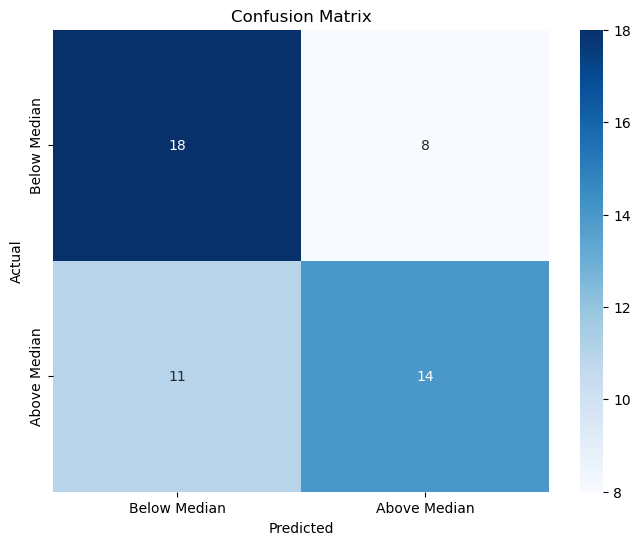

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Below Median', 'Above Median'], yticklabels=['Below Median', 'Above Median'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

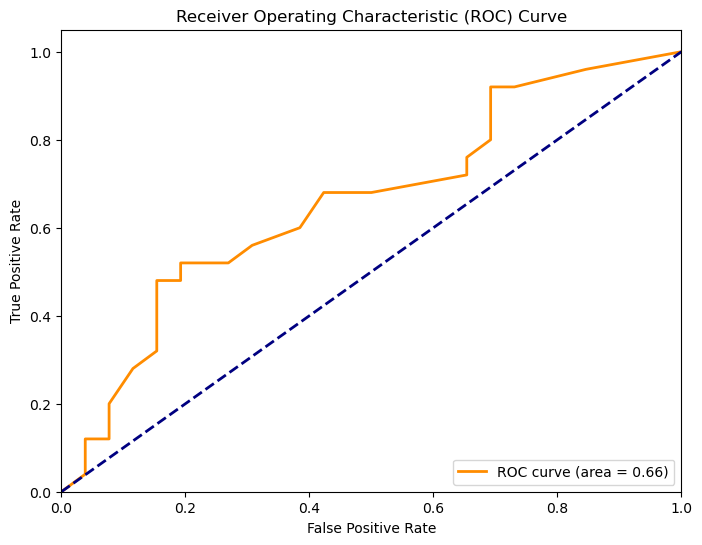

In [22]:
from sklearn.metrics import roc_curve, auc

# Calculate probabilities for the positive class
probs = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Solar Flares and Earthquakes 

In [45]:
# Make sure to load your DataFrame here
df2 = pd.read_csv('Normalized Project Data - Solar Flare Values.csv')

# Calculate the median of 'New Earthquake' column
median_new_earthquake = df2['Earthquake'].median()

# Create a binary classification target based on the median
df2['Earthquake Classification'] = (df2['Earthquake'] > median_new_earthquake).astype(int)

# Select features and target for the classification
X = df2['Solar Flare Value']  # Features
y = df2['Earthquake Classification']  # Binary classification target

In [33]:
df2.columns

Index(['Year', 'Month', 'Total Daily Sunspots',
       'Northern Total Daily Sunspots', 'Southern Total Daily Sunspots',
       'Earthquake', 'Magnitude', 'Longitude', 'Latitude', 'OutagesCount',
       'None', 'D0', 'D1', 'D2', 'D3', 'D4', 'Solar Flare Value',
       'Earthquake Classification'],
      dtype='object')

In [34]:
X.isnull().sum()
X.fillna(0, inplace = True)

In [35]:
import numpy as np

# Reshape the feature variable X
X = X.values.reshape(-1, 1)

In [36]:
from sklearn.metrics import accuracy_score, classification_report

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predictions
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Classification report
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report: \n{report}")

Accuracy: 0.5490196078431373
Classification Report: 
              precision    recall  f1-score   support

           0       0.54      0.73      0.62        26
           1       0.56      0.36      0.44        25

    accuracy                           0.55        51
   macro avg       0.55      0.55      0.53        51
weighted avg       0.55      0.55      0.53        51



In [37]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [38]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Initialize the model
model = RandomForestClassifier(n_estimators=100)

# Configure the k-fold process
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the accuracy for each fold
print(f'Accuracy scores for each fold: {scores}')

# Print the average accuracy
print(f'Average accuracy: {scores.mean()}')

Accuracy scores for each fold: [0.58333333 0.54166667 0.58333333 0.56521739 0.52173913]
Average accuracy: 0.5590579710144927


In [39]:
import numpy as np
import matplotlib.pyplot as plt


importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [41]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

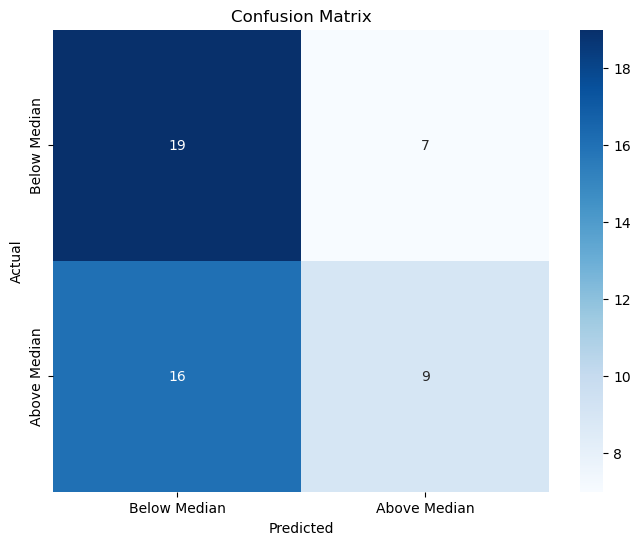

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Below Median', 'Above Median'], yticklabels=['Below Median', 'Above Median'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

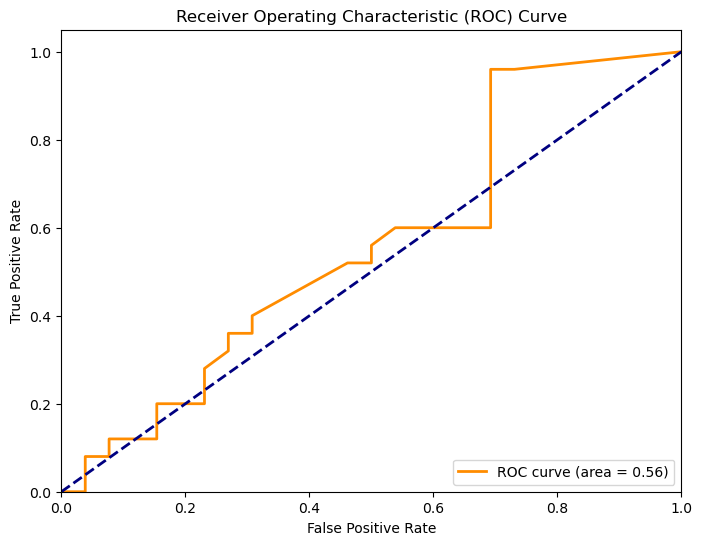

In [43]:
from sklearn.metrics import roc_curve, auc

# Calculate probabilities for the positive class
probs = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()